# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

# 3. Import requiered packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

#### Read Dataset

In [2]:
df = pd.read_csv("data/stud.csv")

#### Show top 5 rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the data

In [4]:
df.shape

(1000, 8)

## 2.1 Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

0

### 3.3 Check datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values in each columns

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of the dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From the above description we can see that all means are close to each other which is in between 66 to 69
- All the standard deviation is ranges between 14 to 15.5
- Minimum score of math_score is 0 and reading_score, writing_score are 17 and 10 respectively which is much higher than the math_score.

### 3.6 Exploring Data

In [10]:
print("Categories present in each column")
for i in df.columns:
    if df[i].dtype == "O":
        print(i, "______: ", df[i].unique())

Categories present in each column
gender ______:  ['female' 'male']
race_ethnicity ______:  ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education ______:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ______:  ['standard' 'free/reduced']
test_preparation_course ______:  ['none' 'completed']


In [11]:
# define Numerical & Categorical data
num_columns = []
cat_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_columns.append(i)
    else:
        num_columns.append(i)

num_features = df[num_columns]
cat_features = df[cat_columns]        

In [12]:
num_features.head(2)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88


In [13]:
cat_features.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


### 3.7 Adding columns "total_score" and "average_score"

In [14]:
df["total_score"] = df.math_score + df.reading_score + df.writing_score
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()
math_full = df[df["math_score"] == 100]["average"].count()

print(f"Number of students scored full marks in Maths: {math_full}")
print(f"Number of students scored full marks in Reading: {reading_full}")
print(f"Number of students scored full marks in Writing: {writing_full}")

Number of students scored full marks in Maths: 7
Number of students scored full marks in Reading: 17
Number of students scored full marks in Writing: 14


In [16]:
reading_20_less = df[df["reading_score"] <= 20]["average"].count()
writing_20_less = df[df["writing_score"] <= 20]["average"].count()
math_20_less = df[df["math_score"] <= 20]["average"].count()

print(f"Number of students scored less than 20 marks in Maths: {math_20_less}")
print(f"Number of students scored less than 20 marks in Reading: {reading_20_less}")
print(f"Number of students scored less than 20 marks in Writing: {writing_20_less}")

Number of students scored less than 20 marks in Maths: 4
Number of students scored less than 20 marks in Reading: 1
Number of students scored less than 20 marks in Writing: 3


#### Insigths
- From above values we can observe that students have perform worst in maths.
- Best performance is in Reading

## 4. Exploring Data(Visualiztion)

#### 4.1 Visualizing average score to make some conclusions
- Histogram
- KDE

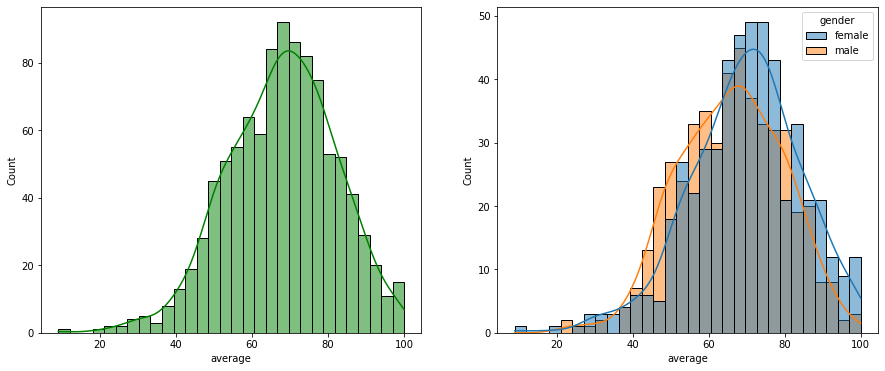

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.histplot(data=df, x="average", kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, bins=30, color='g', hue='gender')

plt.show()

- Most of the student got average marks between 65 to 80.
- Female students tend to perform well than male students.

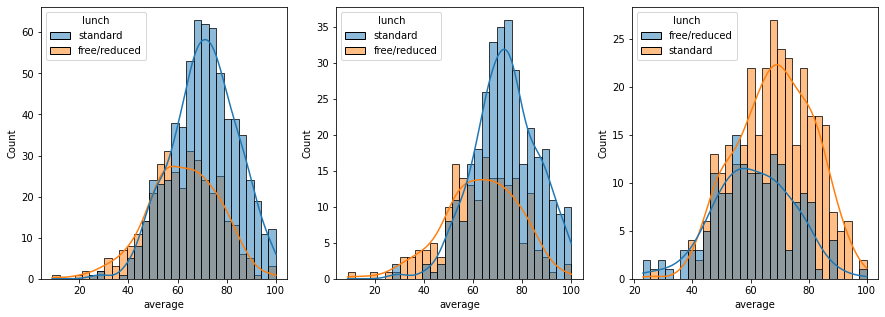

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df, x="average", bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x="average", bins=30, kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x="average", bins=30, kde=True, hue="lunch")
plt.show()

- Having standard lunch helps students to score well in exams
- Standard lunch helps to perform well in exams either it female or male

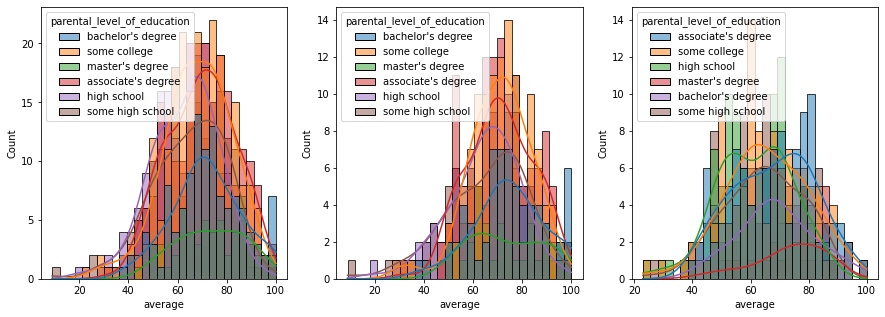

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df, x="average", bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x="average", bins=30, kde=True, hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x="average", bins=30, kde=True, hue="parental_level_of_education")
plt.show()

- In general, parental education don't help much in student performance

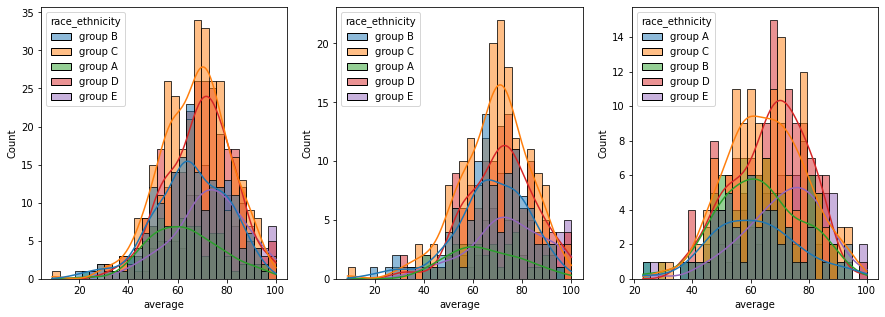

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df, x="average", bins=30, kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x="average", bins=30, kde=True, hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x="average", bins=30, kde=True, hue="race_ethnicity")
plt.show()

- Students from group C and D perform much better.
- Students from group A, B and E performs poorly in all the cases

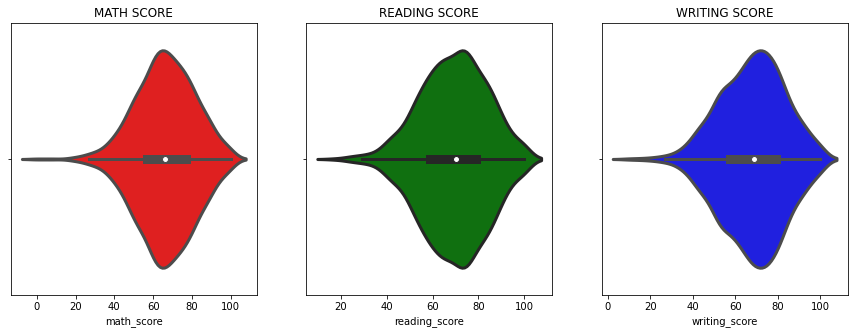

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('MATH SCORE')
sns.violinplot(data=df, x="math_score", color="r", linewidth=3)
plt.subplot(132)
plt.title('READING SCORE')
sns.violinplot(data=df, x="reading_score", color="g", linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORE')
sns.violinplot(data=df, x="writing_score", color="b", linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

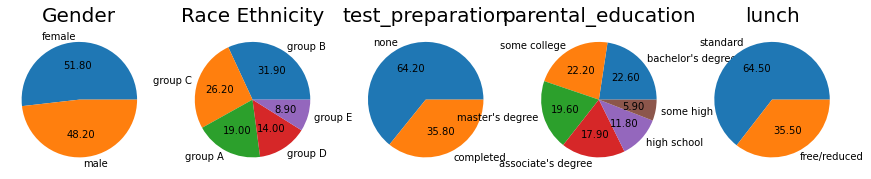

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1, 5, 1)
size = df.gender.value_counts()
label = df.gender.unique()

plt.pie(size, labels=label, autopct='%.2f')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df.race_ethnicity.value_counts()
label = df.race_ethnicity.unique()

plt.pie(size, labels=label, autopct='%.2f')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df.test_preparation_course.value_counts()
label = df.test_preparation_course.unique()

plt.pie(size, labels=label, autopct='%.2f')
plt.title('test_preparation', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df.parental_level_of_education.value_counts()
label = df.parental_level_of_education.unique()

plt.pie(size, labels=label, autopct='%.2f')
plt.title('parental_education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df.lunch.value_counts()
label = df.lunch.unique()

plt.pie(size, labels=label, autopct='%.2f')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.show()



- Number of male and female students are almost equal
- Number of students are greatest in group C
- Most number of students have not enrolled in any test preparation course is greater
- Number of students whose parental education is "bachelor's degree" is greater
- Number of students who have standard lunch is greater

## 4.3 Checking Outliers

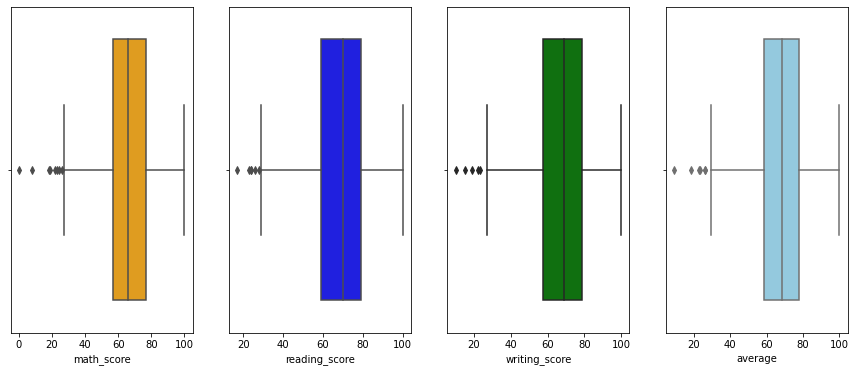

In [23]:
plt.subplots(1, 4, figsize=(15, 6))
plt.subplot(141)
sns.boxplot(x=df["math_score"], color='orange')
plt.subplot(142)
sns.boxplot(x=df["reading_score"], color='b')
plt.subplot(143)
sns.boxplot(x=df["writing_score"], color='g')
plt.subplot(144)
sns.boxplot(x=df["average"], color='skyblue')
plt.show()

### 4.4 Multivariate Analysis using Pairplot

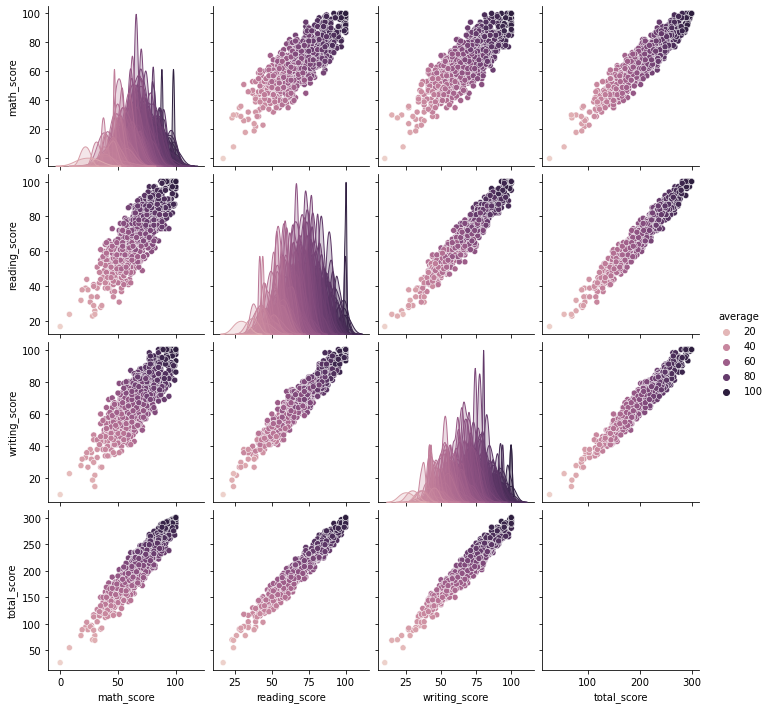

In [24]:
sns.pairplot(df, hue='average')
plt.show()

#### Insights
- From the above plot we clearly see that scores is increasing linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course